- model 2017 year
- use multi level model for whole range

## Welfare self judgment modeling 

In [2]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pymc as pm
import causalgraphicalmodels as cgm

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
data_2017 = pd.read_csv('data/model_data/data_2017.csv')
data_2017.head()

,Nazwa,gminy 2017,gminy mężczyźni 2017,gminy kobiety 2017,miasta 2017,miasta mężczyźni 2017,miasta kobiety 2017,income,"ryż - za 1kg,2017","bułka pszenna - za 50g,2017",...,"ryby i owoce morza,2017,[kg]","mleko świeże,2017,[l]","jogurty,2017,[kg]","sery i twarogi,2017,[kg]","jaja,2017,[szt.]","oleje i tłuszcze,2017,[kg]","owoce,2017,[kg]","warzywa,2017,[kg]","ziemniaki,2017,[kg]","cukier,2017,[kg]"
0,DOLNOŚLĄSKIE,1969944.0,959215.0,1010729.0,932603.0,436192.0,496411.0,"4722,44","3,86","0,45",...,"0,26","2,86","0,59","0,94","10,75","1,14","3,80","7,95","2,74","0,86"
1,KUJAWSKO-POMORSKIE,1320688.0,651250.0,669438.0,762256.0,358061.0,404195.0,"4001,06","3,92","0,42",...,"0,35","3,23","0,62","0,84","11,45","1,17","3,45","8,69","3,67","0,94"
2,LUBELSKIE,1601235.0,786141.0,815094.0,525082.0,244312.0,280770.0,"4079,84","4,39","0,43",...,"0,29","3,65","0,47","0,86","13,84","1,20","3,49","10,08","3,81","1,26"
3,LUBUSKIE,752718.0,369501.0,383217.0,264114.0,125429.0,138685.0,"4036,21","3,61","0,48",...,"0,27","2,74","0,57","0,90","9,81","1,18","3,79","8,02","2,96","0,81"
4,ŁÓDZKIE,1663273.0,807287.0,855986.0,813042.0,372582.0,440460.0,"4218,80","3,56","0,36",...,"0,32","2,74","0,54","0,88","12,57","1,11","3,79","8,98","3,56","1,16"


I will assume naive assumption that each of measured variables doesn't interact between each other. Main goal is to estimate association my predictive variables and goal variable - Welfare. My data refere to voivodeship which is biggest polish adiministrative unit.
- **Welfare** variable is a data from survey conducted by Polish statistical office. It is using linkter five level scale (very good, good, average, rather bad, bad). 
- **Income** average income in particular voivodeship. Currency is in PLN.
- **Prices** prices and consumption are the most complex variables. Prices consist of 237 columns with average prices for some quantity of the product. 
- **Consumption** consists of 83 columns each with average consumption quantity of a product.
- **Population** I have gathered data demographic data of population count in cities and municipalities.

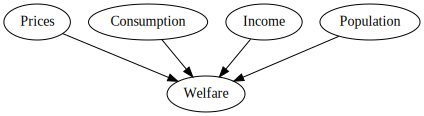

In [4]:
welfare = cgm.CausalGraphicalModel( 
    nodes=["Welfare", "Income", "Prices", "Consumption", "Population"],
    edges=[
        ("season", "Welfare"), 
        ("Income", "Welfare"), 
        ("Prices", "Welfare"),
        ("Consumption", "Welfare"), 
        ("Population", "Welfare")
    ]
) # DAG of the naive model
welfare.draw()

To create this model i will use statistica technique named generalized linear models.
Model formula:
$$

$$

In [ ]:
with pm as naive_model:
    # Priors for unknown model parameters
    a = pm.Normal('a', mu=0, sd=10)
    b_income = pm.Normal('b_income', mu=0, sd=10)
    b_prices = pm.Normal('b_prices', mu=0, sd=10)
    b_consumption = pm.Normal('b_consumption', mu=0, sd=10)
    b_population = pm.Normal('b_population', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = a + b_income*data_2017['Income'] + b_prices*data_2017['Prices'] + b_consumption*data_2017['Consumption'] + b_population*data_2017['Population']

    # Likelihood (sampling distribution) of observations
    Welfare = pm.Normal('Welfare', mu=mu, sd=sigma, observed=data_2017['Welfare'])

    # Inference
    trace = pm.sample(1000, tune=1000, cores=2)